In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import scipy.stats as st
import statsmodels.api as sm

## Esercizio 1

In [2]:
cani = pd.read_csv('cani.csv', sep = ';', decimal=',')
cani

,Cartella,IP,GravitaIP,EtaAnni,MORTE,MC,SURVIVALTIME,Terapia,Antiaritmico,PesoKg,VTricuspide,AsxAo,OndaE,OndaEA,FrazEspuls,FrazAccorc,EDVI,ESVI,Allodiast,Allosist
0,S0601,NO,0,10.35,0,NaN,0,2,NO,5.25,0.00,2.50,1.15,0.97,70.0,37.0,78.69,23.75,1.58,0.99
1,C0621,NO,0,15.21,1,1.0,341,3,NO,6.00,0.00,1.61,1.50,1.47,83.0,51.0,130.58,23.88,1.94,0.99
2,B0918,NO,0,15.77,1,1.0,117,3,NO,3.20,0.00,2.50,1.87,2.08,91.0,62.0,180.35,16.22,2.21,0.84
3,R1009,NO,0,13.54,1,1.0,93,4,SI,26.50,0.00,3.07,2.28,2.85,75.0,44.0,234.17,40.15,2.09,1.16
4,R1513,NO,0,10.72,0,NaN,666,3,NO,11.00,0.00,2.54,0.75,0.86,69.0,38.0,139.84,43.89,1.98,1.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,G1006,SI,3,11.35,1,1.0,46,4,NO,8.80,4.51,2.77,1.74,NaN,78.0,46.0,260.51,41.33,2.23,1.21
157,A1403,SI,3,13.39,1,1.0,275,4,NO,8.00,4.54,2.49,NaN,NaN,74.0,41.0,104.55,29.51,1.76,1.03
158,Z1003,SI,3,12.40,1,1.0,43,3,NO,14.00,4.60,2.52,NaN,NaN,77.0,46.0,371.13,57.22,2.54,1.36
159,B1135,SI,3,14.19,1,1.0,269,4,NO,2.50,5.09,3.10,1.51,2.56,79.0,47.0,180.58,38.38,2.21,1.16


1. Quanti sono i cani seguiti dall'ambulatorio?

In [3]:
len(cani)

161

2. Quanti cani soffrono di ipertensione?

In [4]:
len(cani[cani['IP'] == 'SI'])

58

3. Consideriamo ora l'età dei pazienti:
    3.1 Tracciare un'istogramma dell'età dei cani, fissando ad un anno l'ampiezza delle classi e con intervalli chiusi a sinistra e aperti a destra
    3.2 Descrivere l'età con un indice di centralità e uno di dispersione
    3.3 Quanti sono i pazienti di età compresa tra i 12 (incluso) e 13 (escluso) anni?
    3.4 Cane più anziano
    3.5 Qual'è l'età maggiormente presente?

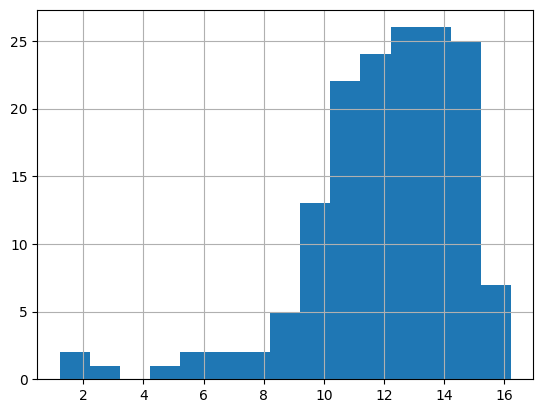

In [11]:
#x = np.arange(cani.EtaAnni.min(), cani.EtaAnni.max(),1)
cani.EtaAnni.hist(bins=np.hstack(np.arange(cani.EtaAnni.min(), cani.EtaAnni.max(),1)))
plt.show()

In [12]:
print(f'Indice di centralità: media = {cani.EtaAnni.mean()}\nIndice di dispersione: deviazione standard = {cani.EtaAnni.std()}')

Indice di centralità: media = 12.124658385093168
Indice di dispersione: deviazione standard = 2.627774731368706


In [16]:
len(cani[(cani['EtaAnni'] >= 12) & (cani['EtaAnni'] < 13)])

32

In [18]:
print(f'Il cane più anziano ha {cani.EtaAnni.max()} anni.')

Il cane più anziano ha 16.84 anni.


In [19]:
print(f'Età maggiormente rappresentata: {cani.EtaAnni.mode()} anni.')

Età maggiormente rappresentata: 0    14.25
1    14.73
Name: EtaAnni, dtype: float64 anni.


## Esercizio 4
Consideriamo MORTE e MC

1. Quanti cani sono deceduti?

In [20]:
len(cani[cani['MC'] == 1])

87

2. 

3. Controllare che non vi siano casi in cui il cane risulta vivo ma deceduto per morte cardiaca

In [21]:
len(cani[(cani['MC'] == 1)&(cani['MORTE'] == 0)])

0

4. Quanti cani sono morti per cause cardiache?

In [23]:
len(cani[cani['MC'] == 1])

87

5. Tra le morti avvenute, quale percentuale è stata per morte cardiaca?

In [24]:
len(cani[cani['MC'] == 1])/len(cani[cani['MORTE'] == 1])

0.7372881355932204

## Esercizio 5
Concentriamoci ora su GravitaIP

1. Si tratta di un carattere scalare, ordinale o nominale?

Si tratta di un attributo quantitativo ordinale

2. Quali valori può assumere?

Assume valori in un dominio discreto

3. Tabella frequenze relative di GravitaIP

In [25]:
gravita_rel = pd.crosstab(cani.GravitaIP, columns=['Abs. Frequence'], colnames=[''], normalize=True)
gravita_rel

,Abs. Frequence
GravitaIP,
0,0.639752
1,0.180124
2,0.111801
3,0.068323


4. Grafico opportuno per descrivere la gravità dell'ipertensione

Essendo un attributo quantitativo discreto, possiamo costruire il grafico a barre delle frequenze relative calcolate in precedenza, con barre ordinate per valore di GravitaIP.

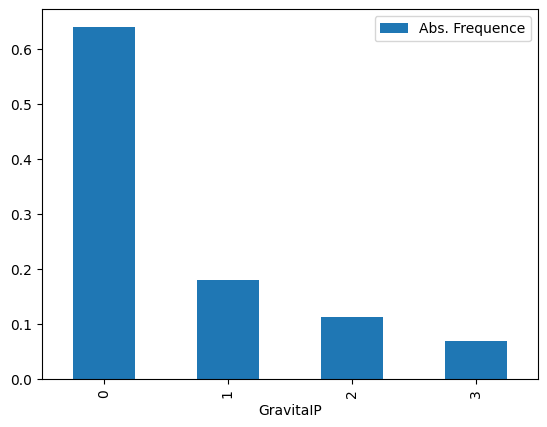

In [30]:
gravita_rel.sort_index().plot.bar()
plt.show()

## Esercizio 2

1. Grafico opportuno per tempo sopravvivenza

SURVIVALTIME è un attributo quantitativo discreto, per cui la rappresentazione grafica più appropriata sarebbe un grafico a barre. Tuttavia, poichè i valori che può assumere sono tanti, il grafico a barre diventa poco chiaro per cui in questo caso possiamo usare un istogramma.

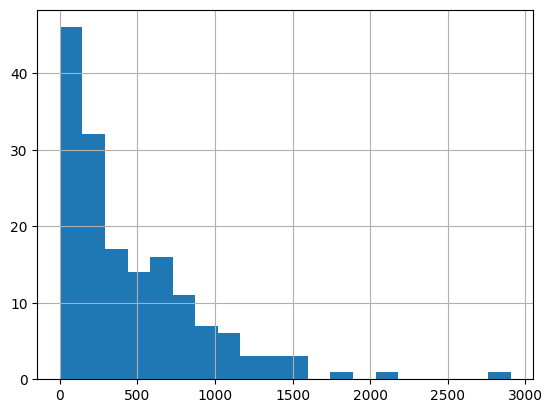

In [40]:
cani.SURVIVALTIME.hist(bins=20)
plt.show()

2. Stima del tempo di sopravvivenza atteso

In [41]:
cani.SURVIVALTIME.mean()

459.888198757764

3. Che stimatore avete usato prima?

Lo stimatore usato prima è la media campionaria

4. Lo stimatore è non distorto?

Sì perchè la media campionaria è sempre stimatore non distorto per il valore atteso della popolazione ed è sempre consistente in media quadratica.

6. Stima della deviazione standard del tempo di sopravvivenza

In [42]:
cani.SURVIVALTIME.std()

467.19670634793675

7. Numero osservazioni sufficiente affinchè, nella stima del valore atteso, si compia un errore al più di 60 giorni con probabilità almeno 0.9

In [43]:
z = st.norm(0,1)
a = cani.SURVIVALTIME.std()/60
arg = 1-(0.1/2)
(a*z.ppf(arg))**2

164.04067877198335

8. La taglia del campione è sufficiente a garantire le condizioni del punto precedente?

In [45]:
print(f'No perchè il campione contiene {len(cani.SURVIVALTIME.dropna())} osservazioni, che non bastano (ne servono almeno 164).')

No perchè il campione contiene 161 osservazioni, che non bastano (ne servono almeno 164).


9. Stimatore del tempo di sopravvivenza atteso, espresso in anni

In [46]:
cani.SURVIVALTIME.mean()/365

1.2599676678294904

## Esercizio 3

1. EDVI e Allodiast sono indipendenti?

Per validare questa ipotesi possiamo costruire uno scatter plot e calcolare l'indice di correlazione lineare.

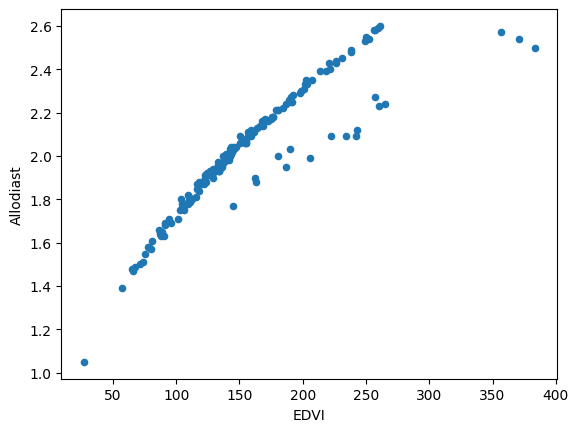

In [47]:
cani.plot.scatter('EDVI', 'Allodiast')
plt.show()